# Relax Inc. Take-Home Challenge
Ann Okafor - Springboard Data Science Career Track

In [1]:
import pandas as pd

# Load the datasets
user_engagement_path = 'takehome_user_engagement.csv'
users_path = 'takehome_users.csv'

# Read the CSV files into Pandas dataframes
try:
    user_engagement_df = pd.read_csv(user_engagement_path, parse_dates=['time_stamp'])
    users_df = pd.read_csv(users_path, encoding='latin-1', parse_dates=['creation_time'])
except Exception as e:
    raise Exception(f"Error reading CSV files: {e}")

# Show the first few rows of each dataframe to get an overview of the data
user_engagement_df.head(), users_df.head()

(           time_stamp  user_id  visited
 0 2014-04-22 03:53:30        1        1
 1 2013-11-15 03:45:04        2        1
 2 2013-11-29 03:45:04        2        1
 3 2013-12-09 03:45:04        2        1
 4 2013-12-25 03:45:04        2        1,
    object_id       creation_time               name  \
 0          1 2014-04-22 03:53:30     Clausen August   
 1          2 2013-11-15 03:45:04      Poole Matthew   
 2          3 2013-03-19 23:14:52  Bottrill Mitchell   
 3          4 2013-05-21 08:09:28    Clausen Nicklas   
 4          5 2013-01-17 10:14:20          Raw Grace   
 
                         email creation_source  last_session_creation_time  \
 0    AugustCClausen@yahoo.com    GUEST_INVITE                1.398139e+09   
 1      MatthewPoole@gustr.com      ORG_INVITE                1.396238e+09   
 2  MitchellBottrill@gustr.com      ORG_INVITE                1.363735e+09   
 3   NicklasSClausen@yahoo.com    GUEST_INVITE                1.369210e+09   
 4          GraceRaw@yaho

In [2]:
# Check for missing values in both dataframes
missing_values_engagement = user_engagement_df.isnull().sum()
missing_values_users = users_df.isnull().sum()

# Check data types for each column
data_types_engagement = user_engagement_df.dtypes
data_types_users = users_df.dtypes

missing_values_engagement, missing_values_users, data_types_engagement, data_types_users


(time_stamp    0
 user_id       0
 visited       0
 dtype: int64,
 object_id                        0
 creation_time                    0
 name                             0
 email                            0
 creation_source                  0
 last_session_creation_time    3177
 opted_in_to_mailing_list         0
 enabled_for_marketing_drip       0
 org_id                           0
 invited_by_user_id            5583
 dtype: int64,
 time_stamp    datetime64[ns]
 user_id                int64
 visited                int64
 dtype: object,
 object_id                              int64
 creation_time                 datetime64[ns]
 name                                  object
 email                                 object
 creation_source                       object
 last_session_creation_time           float64
 opted_in_to_mailing_list               int64
 enabled_for_marketing_drip             int64
 org_id                                 int64
 invited_by_user_id                   f

In [3]:
import numpy as np

# Convert Unix timestamp to datetime object
users_df['last_session_creation_time'] = pd.to_datetime(users_df['last_session_creation_time'], unit='s')

# Fill missing values for 'invited_by_user_id' with -1
users_df['invited_by_user_id'].fillna(-1, inplace=True)

# Fill missing values for 'last_session_creation_time' with the value from 'creation_time'
users_df['last_session_creation_time'].fillna(users_df['creation_time'], inplace=True)

# Re-check for missing values in both dataframes
missing_values_engagement_updated = user_engagement_df.isnull().sum()
missing_values_users_updated = users_df.isnull().sum()

missing_values_engagement_updated, missing_values_users_updated


(time_stamp    0
 user_id       0
 visited       0
 dtype: int64,
 object_id                     0
 creation_time                 0
 name                          0
 email                         0
 creation_source               0
 last_session_creation_time    0
 opted_in_to_mailing_list      0
 enabled_for_marketing_drip    0
 org_id                        0
 invited_by_user_id            0
 dtype: int64)

In [4]:
from datetime import timedelta

# Sort the user engagement data by user_id and time_stamp
user_engagement_df = user_engagement_df.sort_values(['user_id', 'time_stamp'])

# Create an empty set to hold the IDs of adopted users
adopted_users = set()

# Loop through each user to identify if they are an "adopted user"
for user_id in user_engagement_df['user_id'].unique():
    user_data = user_engagement_df[user_engagement_df['user_id'] == user_id]
    user_data = user_data.reset_index(drop=True)
    
    # Loop through the time stamps to find if there is a sequence of 3 logins within 7 days
    for i in range(len(user_data) - 2):
        time_diff = user_data.loc[i + 2, 'time_stamp'] - user_data.loc[i, 'time_stamp']
        if time_diff <= timedelta(days=7):
            adopted_users.add(user_id)
            break

# Convert the set to a list for easier manipulation later
adopted_users = list(adopted_users)

# Count of adopted users
len(adopted_users)


1656

In [5]:
# Create a new column 'is_adopted' in the users dataframe
users_df['is_adopted'] = users_df['object_id'].apply(lambda x: 1 if x in adopted_users else 0)

# Check the first few rows to confirm the changes
users_df.head()


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,is_adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0


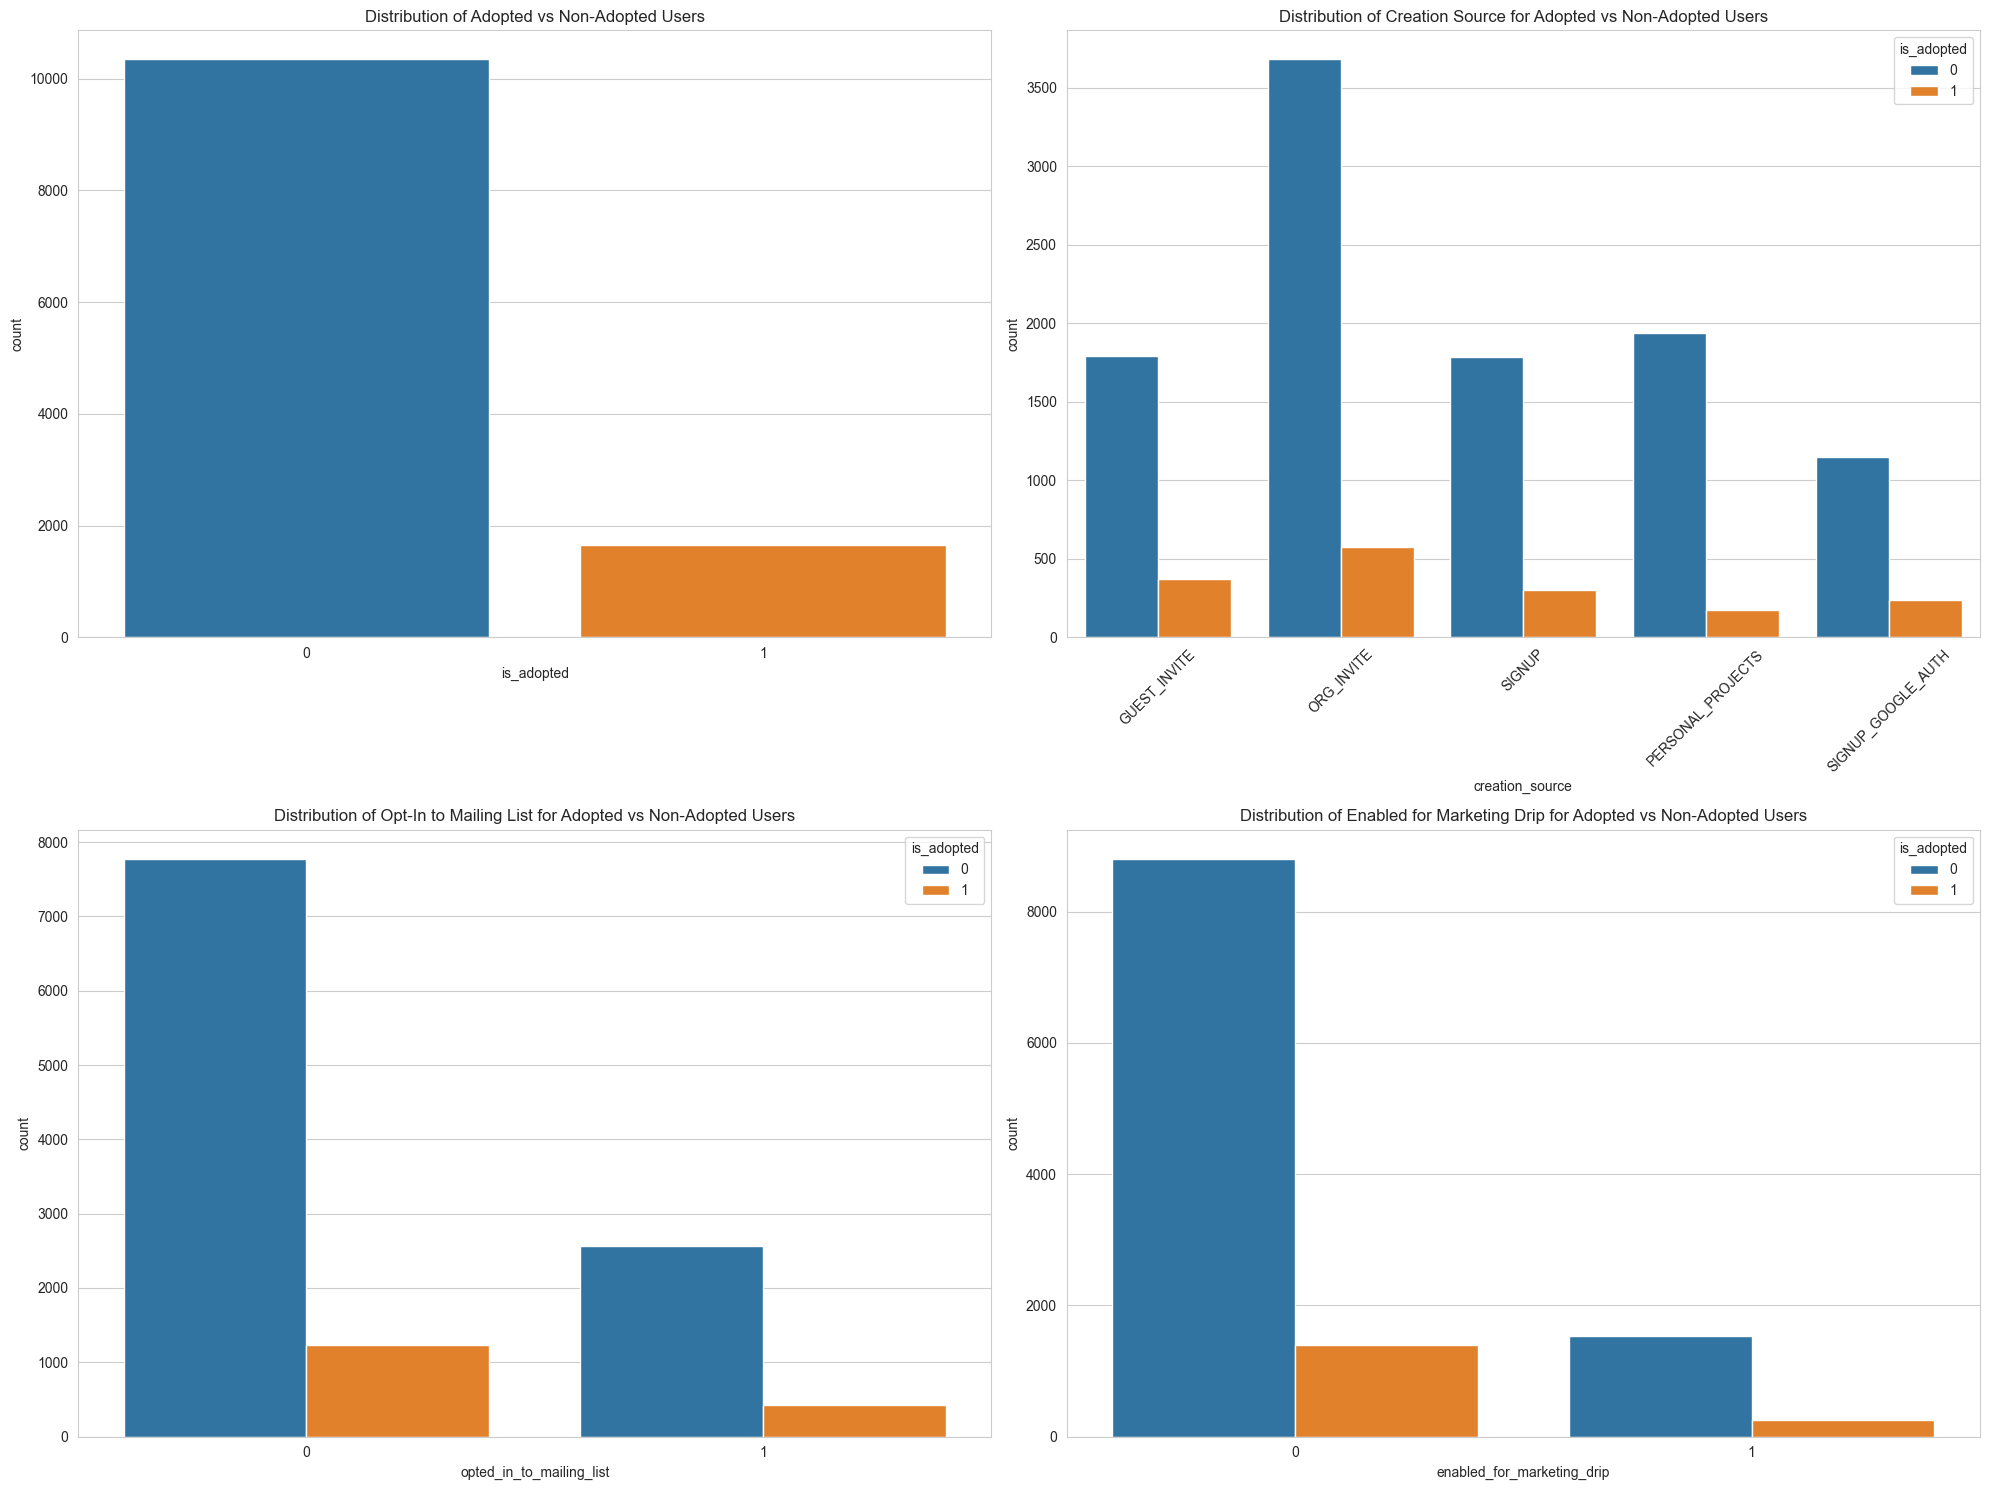

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 15))

# Create subplots
plt.subplot(2, 2, 1)
sns.countplot(data=users_df, x='is_adopted')
plt.title('Distribution of Adopted vs Non-Adopted Users')

plt.subplot(2, 2, 2)
sns.countplot(data=users_df, x='creation_source', hue='is_adopted')
plt.title('Distribution of Creation Source for Adopted vs Non-Adopted Users')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
sns.countplot(data=users_df, x='opted_in_to_mailing_list', hue='is_adopted')
plt.title('Distribution of Opt-In to Mailing List for Adopted vs Non-Adopted Users')

plt.subplot(2, 2, 4)
sns.countplot(data=users_df, x='enabled_for_marketing_drip', hue='is_adopted')
plt.title('Distribution of Enabled for Marketing Drip for Adopted vs Non-Adopted Users')

plt.tight_layout()
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Selecting relevant features and target variable
features = ['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id']
target = 'is_adopted'

# Prepare the features
X = users_df[features]

# Encoding categorical variables
label_encoder = LabelEncoder()
X['creation_source'] = label_encoder.fit_transform(X['creation_source'])

# Prepare the target variable
y = users_df[target]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Show the shape of the resulting sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


C:\Users\annco\AppData\Local\Temp\ipykernel_9924\2765455694.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['creation_source'] = label_encoder.fit_transform(X['creation_source'])


((9600, 5), (2400, 5), (9600,), (2400,))

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42, class_weight='balanced')

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep


(0.7658333333333334,
 '              precision    recall  f1-score   support\n\n           0       0.87      0.86      0.86      2069\n           1       0.17      0.18      0.18       331\n\n    accuracy                           0.77      2400\n   macro avg       0.52      0.52      0.52      2400\nweighted avg       0.77      0.77      0.77      2400\n')

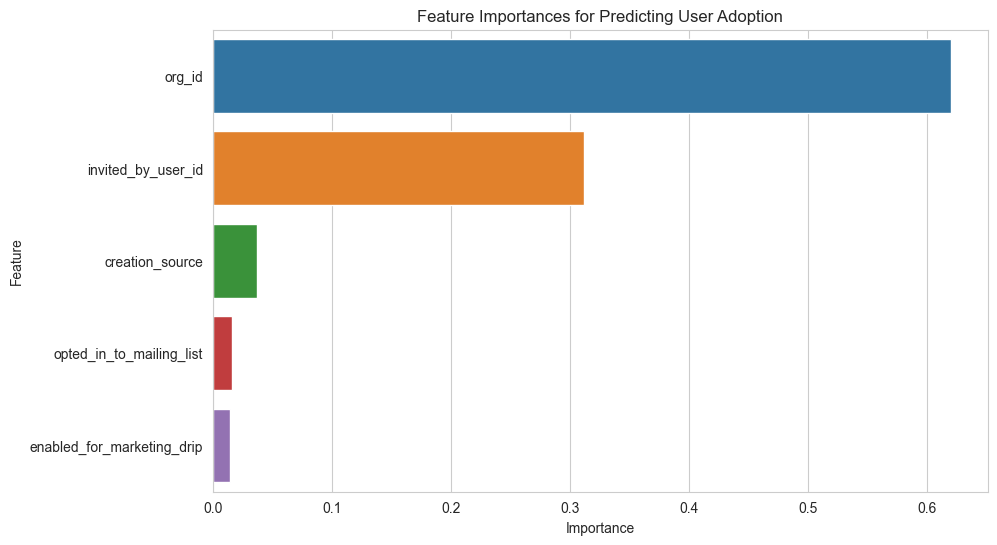

,Feature,Importance
3,org_id,0.619829
4,invited_by_user_id,0.311933
0,creation_source,0.037188
1,opted_in_to_mailing_list,0.016189
2,enabled_for_marketing_drip,0.014860


In [9]:
# Extract feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame by the importances
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importances for Predicting User Adoption')
plt.show()

feature_importance_df


### **Feature Importances:**
The following features are ranked in terms of their importance for predicting user adoption:

1. Organization ID (org_id): The most important feature, with an importance of approximately 62%.
2. Invited by User ID (invited_by_user_id): The second most important feature, with an importance of approximately 31%.
3. Creation Source (creation_source): Has an importance of approximately 3.7%.
4. Opted-in to Mailing List (opted_in_to_mailing_list): Has an importance of approximately 1.6%.
5. Enabled for Marketing Drip (enabled_for_marketing_drip): Has an importance of approximately 1.5%.

### **Summary:**
- A total of 1,656 "adopted users" were identified based on the given criteria.
- Organization ID and who invited the user are significant predictors of user adoption.
- Features like mailing list opt-in and marketing drip have less predictive power.
- The Random Forest model achieved an accuracy of approximately 76.6% on the test data.